# The Modified Ramsey-Cass-Koopman's model During World War 2

Here I wanted to take the model from András and Professor Hill about economic growth and expand it. I also wanted to make it more of a visual experience becasue the functions themselves are rather simple. Hopefully adding a second conutry will make this project really interesting. I will use the two countries to compare savings rate using the new function with control flow during the time of the second world war. 

#### Make Some Country Codes for US and Japan

```
cc_usa = "USD"
cc_japan = "JPY"
```

#### Terms

An economy has a certain amount of:

* GDP, Y &mdash; which in an advanced economy is a function of how much capital is in operation
* capital, K &mdash; you can remember what that stands for because Karl Marx spelled *Das Kapital* with a K &mdash; this is the amount of machinery for production &mdash; such as silicon wafer fabrication lines, lithium-ion battery factories or cranes to build buildings
* investment in additional capital, I &mdash; known as savings
* depreciation of capital, D, &mdash; depreciation is due to aging of the capital stock
* time, T &mdash; capital T in this notebook is the same as the lower-case t we have been using in our physics models &mdash; economists like capital letters for their variables

(GDP stands for Gross Domestic Product and is the rate of production of goods and services.)

### Units

If we were applying this to something like the State of California, to make the ideas more concrete you can imagine that the units are:

* Y, millions of USD / year
* K, millions of USD
* I, millions of USD / year
* D, millions of USD / year
* T, years

(USD is the currency code for United States Dollars. Example currency codes you might run into in economics texts are CAD for Canadian dollar, EUR for Euro, JPY for Japanese Yen, or RMB for Chinese Renminbi.)

Whatever units you are using, K is an amount, and Y, I, and D are amounts per time.

In [1]:
# Use the numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each economic function:
import unittest

## What's actually happening?

These are the same variables and constants as the notebook provided by our professors. The numbers have changed and I have added a second counntry where all the names are the same but with a '2' at the end to decipher between both countries. 

In [2]:
#Country Codes and year the war started moving
cc_usa = "USD"
cc_japan = "JPY"
current_year = 1935


# JAPAN
capital = 3000.0 # so this economy starts with 1 billion in capital if the units are millions of USD

# Define the factors controlling the rates of change
production_rate = 35.0  # lower-case p in the equations on the board
depreciation_rate = 0.05 # lower-case delta (nothing to do with delta_t!) in the equations on the board

# Define simulation time -- we are going to do 100 steps of 1 year each -- total 100 years
simulation_time_steps = 100 
delta_T = 1.0 # time step in years

########## This is where the second country starts

# USA
capital2 = 4000.0 # so this economy starts with 1 billion in capital if the units are millions of USD

# Define the factors controlling the rates of change
production_rate2 = 38.0  # lower-case p in the equations on the board
depreciation_rate2 = 0.005 # lower-case delta (nothing to do with delta_t!) in the equations on the board

# Define simulation time -- we are going to do 100 steps of 1 year each -- total 100 years
simulation_time_steps2 = 100 
delta_T2 = 1.0 # time step in years

## These are the functions Neccessary to produce the graphs 

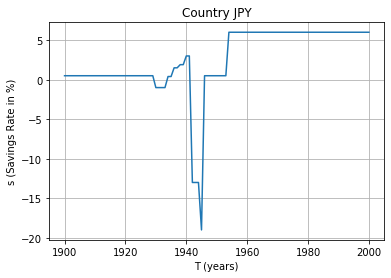

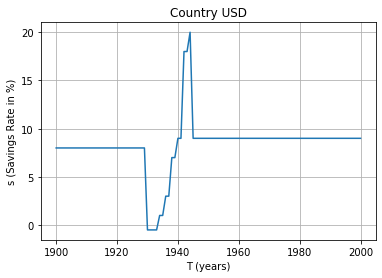

In [3]:
# The production function of the economy
def production_function(country_code, K):
    if country_code == cc_japan:
        Y = production_rate * np.sqrt(K)
        return Y
    elif country_code == cc_usa:
        Y = production_rate2 * np.sqrt(K)
        return Y
    else:
        raise Exception('Unsupported country code: {}'.format(country_code))
    

# Loss of capital due to depreciation
def depreciation(country_code, K):
    if country_code == cc_japan:
        depreciation = depreciation_rate * K
        return depreciation
    elif country_code == cc_usa:
        depreciation = depreciation_rate2 * K
        return depreciation
    else:
        raise Exception('Unsupported country code: {}'.format(country_code))
        
    

# Accumulation of capital due to savings
def investment(country_code, Y, current_year):
    savings_rate = savings_rate_yearly(country_code, current_year)
    inv = savings_rate * Y
    return inv


#Savings Rate as a Function of Time
def savings_rate_yearly(country_code, current_year):
    if country_code == cc_usa:
        
        if current_year <= 1929:
            return 0.08
        elif current_year <= 1933:
            return -0.005
        elif current_year <= 1935:
            return 0.01
        elif current_year <= 1937:
            return 0.03
        elif current_year <= 1939:
            return 0.07
        elif current_year <= 1941 or current_year >= 1945:
            return 0.09
        elif current_year == 1944:
            return 0.2
        else:
            return 0.18
    elif country_code == cc_japan:
        
        if current_year <= 1929:
            return 0.005
        elif current_year <= 1933:
            return -0.01
        elif current_year <= 1935:
            return 0.004
        elif current_year <= 1937:
            return 0.015
        elif current_year <= 1939:
            return 0.019
        elif current_year <= 1941:
            return 0.03
        elif current_year < 1945:
            return -0.13
        elif current_year == 1945:
            return -0.19
        elif current_year <= 1953:
            return 0.005
        else:
            return 0.06
    else:
        raise Exception('Unsupported country code: {}'.format(country_code))


### Graph the savings rate to see the difference during the war

savings_rates_to_plot = np.zeros((simulation_time_steps + 1,))
times_to_plot = np.zeros((simulation_time_steps + 1,))

for i in range(0, simulation_time_steps + 1):
    savings_rates_to_plot[i] = savings_rate_yearly("JPY", i + 1900.0)
    times_to_plot[i] = 1900.0 + i
    
savings_rates_to_plot_2 = np.zeros((simulation_time_steps + 1,))
times_to_plot_2 = np.zeros((simulation_time_steps + 1,))
    
for i in range(0, simulation_time_steps + 1):
    savings_rates_to_plot_2[i] = savings_rate_yearly("USD", i + 1900.0)
    times_to_plot_2[i] = 1900.0 + i
    

    
plt.plot(times_to_plot, savings_rates_to_plot * 100.0)
plt.xlabel("T (years)")
plt.ylabel("s (Savings Rate in %)")
plt.title("Country " + "JPY")
plt.grid()
plt.show()

plt.plot(times_to_plot_2, savings_rates_to_plot_2 * 100.0)
plt.xlabel("T (years)")
plt.ylabel("s (Savings Rate in %)")
plt.title("Country " + "USD")
plt.grid()
plt.show()

## Executing Both Models

In [4]:

# Use the np functions to pre-allocate all of our variables
Ys = np.zeros((simulation_time_steps + 1,))
Ts = np.zeros((simulation_time_steps + 1,))
Ks = np.zeros((simulation_time_steps + 1,))
Is = np.zeros((simulation_time_steps + 1,))
growths = np.zeros((simulation_time_steps + 1,))

# Set the initial K, Y, I, and T
Ks[0] = capital
Ys[0] = production_function("JPY", capital)
Is[0] = investment("JPY", capital, 1900.0)
Ts[0] = 1900.0

# The for loop that does the main work
for i in range(1, simulation_time_steps + 1):
    before_K = Ks[i - 1]
    before_Y = Ys[i - 1]
    before_T = Ts[i - 1]
    
    inv = investment("JPY", before_Y, before_T)
    after_K = before_K + (inv - depreciation("JPY", before_K)) * delta_T
    after_Y = production_function("JPY", after_K)
    growth = (after_Y - before_Y) / before_Y
    after_T = before_T + delta_T
    
    # Put our calculations into the array and continue the for loop
    Ks[i] = after_K
    Ys[i] = after_Y
    growths[i] = growth
    Ts[i] = after_T
    Is[i] = inv

    
##### Country 2

# Time trajectory of growth

# Use the np functions to pre-allocate all of our variables
Ys2 = np.zeros((simulation_time_steps2 + 1,))
Ts2 = np.zeros((simulation_time_steps2 + 1,))
Ks2 = np.zeros((simulation_time_steps2 + 1,))
Is2 = np.zeros((simulation_time_steps2 + 1,))
growths2 = np.zeros((simulation_time_steps2 + 1,))

# Set the initial K, Y,I, and T a second time for the second country 
Ks2[0] = capital2
Ys2[0] = production_function("USD", capital2)
Is2[0] = investment("USD", capital, 1900.0)
Ts2[0] = 1900.0

# The for loop that does the main work
for i in range(1, simulation_time_steps + 1):
    before_K2 = Ks2[i - 1]
    before_Y2 = Ys2[i - 1]
    before_T2 = Ts2[i - 1]
    
    inv2 = investment("USD", before_Y2, before_T2)
    after_K2 = before_K2 + (inv2 - depreciation("USD", before_K2)) * delta_T2
    after_Y2 = production_function("USD", after_K2)
    growth2 = (after_Y2 - before_Y2) / before_Y2
    after_T2 = before_T2 + delta_T2
    
    # Put our calculations into the array and continue the for loop
    Ks2[i] = after_K2
    Ys2[i] = after_Y2
    growths2[i] = growth2
    Ts2[i] = after_T2
    Is2[i] = inv2




## Plot Investment by Time

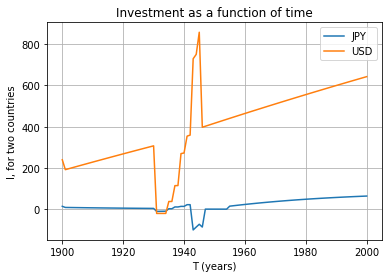

In [5]:
plt.plot(Ts, Is)
plt.plot(Ts2, Is2)
plt.xlabel("T (years)")
plt.ylabel("I, for two countries")
plt.title("Investment as a function of time")
plt.legend(("JPY", "USD"))
plt.grid()
plt.show()


## Plot GDP by Time

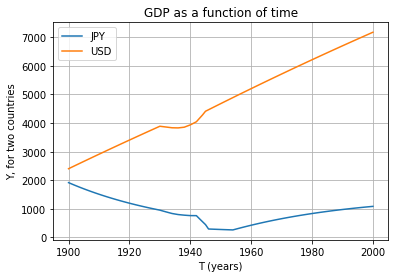

In [6]:
plt.plot(Ts, Ys)
plt.plot(Ts2, Ys2)
plt.xlabel("T (years)")
plt.ylabel("Y, for two countries")
plt.title("GDP as a function of time")
plt.legend(("JPY", "USD"))
plt.grid()
plt.show()


## Plot Growth Rate by Time

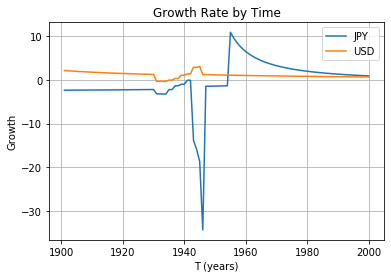

In [7]:
# Plot growth rate by time
# The 0th entry in the growths array doesn't make sense
# because there wasn't a prior Y to calculate growth from.
# So we delete those before plotting growth.

#Country One

Ts_deleted0 = np.delete(Ts, 0)
growths_deleted0 = np.delete(growths, 0)
growths_deleted0 = growths_deleted0 * 100

#Country Two 

Ts_deleted02 = np.delete(Ts2, 0)
growths_deleted02 = np.delete(growths2, 0)
growths_deleted02 = growths_deleted02 * 100

plt.plot(Ts_deleted0, growths_deleted0)
plt.plot(Ts_deleted02, growths_deleted02)
plt.xlabel("T (years)")
plt.ylabel("Growth")
plt.title("Growth Rate by Time")
plt.legend(("JPY", "USD"))
plt.grid()
plt.show()


### Conclusion

Overall, we can see that the war effected both economies differently. Post-war, the economies somewhat went back to normal. I have acheived my goal of making the models way cooler by making specific variables a function of time rather than plotted values. The comparisons made the graphs more appealing and made this project worth while.